In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
dataset = pd.read_csv('Diabetes_Clasificasion_Dataset.csv')
x = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, -1].values

In [59]:
print (x)

[[40 85]
 [40 92]
 [45 63]
 ...
 [40 83]
 [40 60]
 [45 82]]


In [60]:
print (y)

[0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0
 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 0 0 1 1 1 0 

In [61]:
from sklearn.model_selection import train_test_split
x_latih, x_test, y_latih, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [62]:
print (x_latih)

[[45 90]
 [45 73]
 [40 92]
 ...
 [40 83]
 [50 90]
 [50 75]]


In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_latih = sc.fit_transform(x_latih)
x_test = sc.transform(x_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [65]:
y_pred = classifier.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_test, y_pred)
print(hasil_cm)

[[ 96   8]
 [ 19 126]]


In [70]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_pred)
print ("Tingkat Akurasi: %d persen "%(akurasi*100))

Tingkat Akurasi: 89 persen 


<ipython-input-71-fbdd586899ca>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


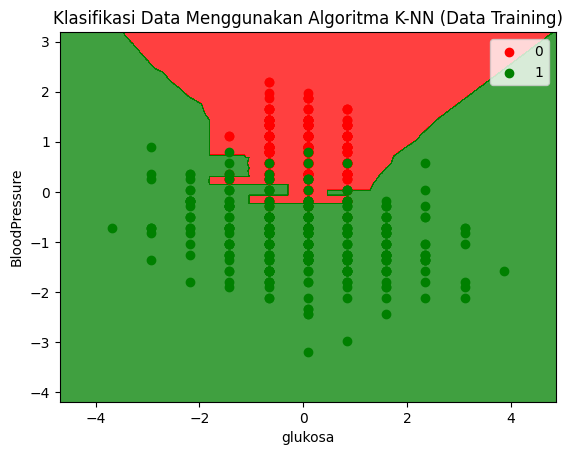

In [71]:
from matplotlib.colors import ListedColormap

x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf (x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha= 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())

for g, h in enumerate(np.unique(y_test)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c=ListedColormap(('red', 'green'))(g), label=h)

plt.title('Klasifikasi Data Menggunakan Algoritma K-NN (Data Training)')
plt.xlabel('glukosa')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

<ipython-input-73-45249b0b68fe>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


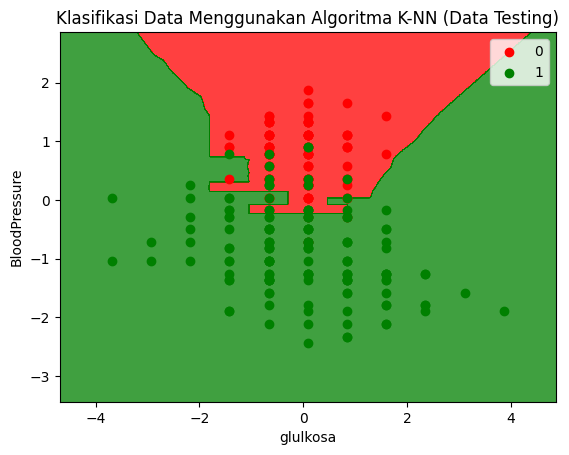

In [73]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha= 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Klasifikasi Data Menggunakan Algoritma K-NN (Data Testing)')
plt.xlabel('glulkosa')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()